In [51]:

import math
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

from sklearn import decomposition, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import graphviz # If you don't have this, install via pip/conda
%matplotlib inline

## Read Data

In [64]:
def read_csv(filepath):
    import pandas as pd
    return pd.read_csv(filepath)

In [ ]:
main = read_csv('credit-data.csv')

## Pre-Process Data

In [18]:
have_na = main.loc[:, main.isna().any()]

In [19]:
# replaces NA's in 'NumberOfDependents' with mean
mean_dep = main.NumberOfDependents.mean()
main['NumberOfDependents'].fillna(mean_dep, inplace=True)

In [20]:
# replaces NA's in 'MonthlyIncome' with mean
mean_inc = main.MonthlyIncome.mean()
main['MonthlyIncome'].fillna(mean_inc, inplace=True)

## Explore Data

In [33]:
relevant = main[['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]
mean_age = relevant.groupby('age').mean()

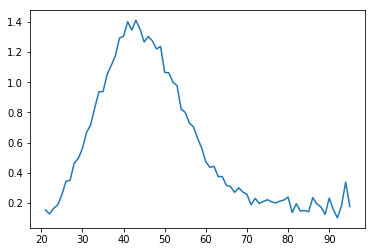

In [22]:
# graph average delinquincies at each age
age_dlq = mean_age.drop([103, 109, 96, 97, 98, 99])
x = list(age_dlq.index.values)
y = list(age_dlq.NumberOfDependents.values)
plt.plot(x, y)
plt.show()

## Generalize Features/Predictors

## Build Classifier

In [46]:
# K Nearest Neighbors

In [47]:
X = relevant
Y = relevant['SeriousDlqin2yrs']
test_size = 0.3 # you can adjust this
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', metric_params={'p': 3})
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
nn = sklearn.neural_network.MLPClassifier()
nn.fit(x_train, y_train)
print("The number of hidden layers is", nn.n_layers_ - 2)

The number of hidden layers is 1


## Evaluate Classifier

In [63]:
# K Nearest Neighbors

print('Training: ')
print(knn.score(x_train, y_train))
print('Testing: ')
print(knn.score(x_test, y_test))

# probably overfitted 

Training: 
1.0
Testing: 
0.785453067859


In [62]:
# Neural Net

print('Training: ')
print(nn.score(x_train, y_train))
print('Testing: ')
print(nn.score(x_test, y_test))

Training: 
0.830692069242
Testing: 
0.833157253149
